In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [18]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
df.shape

(48842, 15)

In [20]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [21]:
df.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [22]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [25]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [28]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [42]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [29]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [30]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [40]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

C:\Users\srira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


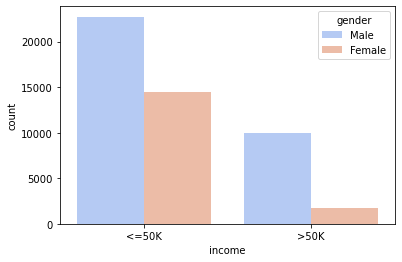

In [32]:
sns.countplot(df['income'], palette='coolwarm', hue='gender', data=df );

C:\Users\srira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


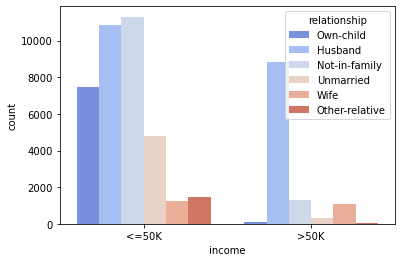

In [34]:
sns.countplot(df['income'], palette='coolwarm', hue='relationship', data=df );

In [35]:
# Filling ? values

In [36]:
df['workclass']= df['workclass'].replace('?', 'Private')
df['occupation']= df['occupation'].replace('?', 'Prof-specialty ')
df['native-country']= df['native-country'].replace('?', 'United-States')

In [38]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [39]:
# Feature Engineering

In [41]:
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th','9th', '10th','11th','12th'], 'school')
df.education= df.education.replace('HS-grad', 'high-school')
df.education= df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher-education')
df.education= df.education.replace('Bachelors', 'under-grads')
df.education= df.education.replace('Masters', 'Grads')
df.education= df.education.replace('Doctorate', 'Doc')

In [43]:
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse '], 'Married')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')
df['marital-status']= df['marital-status'].replace('Never-married', 'single')

In [44]:
df.income= df.income.replace('<=50K', 0)
df.income= df.income.replace('>50K',1)

In [45]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,high-school,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Higher-education,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Higher-education,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Higher-education,10,single,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,school,6,single,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,227026,high-school,9,single,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Higher-education,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Higher-education,10,single,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,school,4,Married,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [46]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<AxesSubplot:>

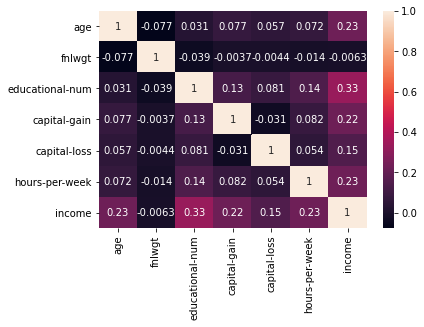

In [52]:
sns.heatmap(df.corr(), annot=True)

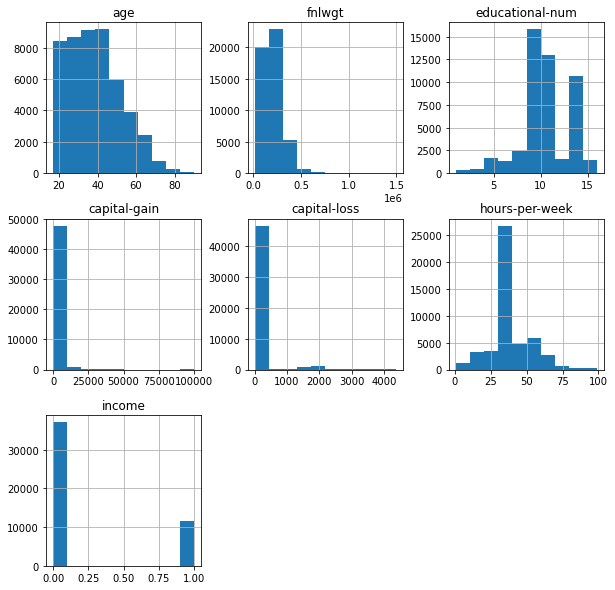

In [54]:
df.hist(figsize= (10,10), layout= (3,3), sharex=False);

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

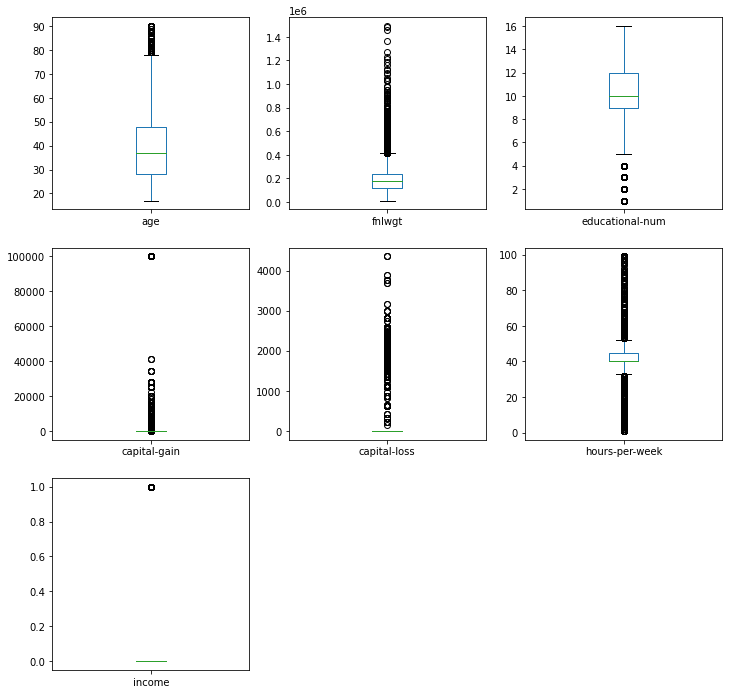

In [55]:
df.plot(kind='box', figsize= (12,12), layout= (3,3), sharex=False , subplots=True)

C:\Users\srira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


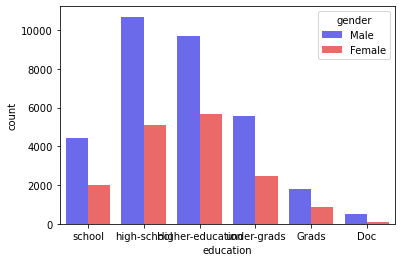

In [63]:
sns.countplot(df['education'], hue= 'gender', data=df, palette= 'seismic');

In [59]:
# Model Building

In [64]:
x= df.drop(['income'], axis=1)
y=df['income']

In [ ]:
# Feature_Scaling

In [65]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [68]:
df1=df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,4,6,3,6,3,2,1,0,0,39,38,0
1,21,3,4212,3,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,2,11,0,11,0,4,1,0,0,39,38,1
3,27,3,11201,2,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,2,9,3,10,3,4,0,0,0,29,38,0
5,17,3,16434,4,5,3,7,1,4,1,0,0,29,38,0
6,12,3,19356,3,8,3,10,4,2,1,0,0,39,38,0
7,46,5,5538,2,14,0,9,0,4,1,52,0,31,38,1
8,7,3,26412,2,9,3,7,4,4,0,0,0,39,38,0
9,38,3,5578,4,3,0,2,0,4,1,0,0,9,38,0


In [76]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [77]:
x= ss.transform(df1.drop('income', axis=1))
y= df['income']

In [78]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=.25, random_state=40)

In [79]:
# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr= LogisticRegression()

In [97]:
model= lr.fit(x_train,y_train)
prediction= model.predict(x_test)
print("Acc on Training data {:,.3f}".format (lr.score(x_train,y_train)))
print("Acc on Testing data {:,.3f}".format (lr.score(x_test,y_test)))

Acc on Training data 0.841
Acc on Testing data 0.841


In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(criterion="gini", n_estimators=200)
model1= rfc.fit(x_train,y_train)
prediction1= model1.predict(x_test)
print("Acc on Training dataL {:,.3f}".format (rfc.score(x_train,y_train)))
print("Acc on Testing data {:,.3f}".format (rfc.score(x_test,y_test)))

Acc on Training dataL 1.000
Acc on Testing data 0.857


In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9259
           1       0.74      0.63      0.68      2952

    accuracy                           0.86     12211
   macro avg       0.81      0.78      0.79     12211
weighted avg       0.85      0.86      0.85     12211



In [99]:
knn = KNeighborsClassifier(n_neighbors = 50)

In [101]:
model2= knn.fit(x_train,y_train)
prediction2= model2.predict(x_test)

print("Acc on Training dataL {:,.3f}".format (knn.score(x_train,y_train)))
print("Acc on Training dataL {:,.3f}".format (knn.score(x_test,y_test)))

Acc on Training dataL 0.855
Acc on Training dataL 0.846
